# Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import warnings

5. Topic modeling and clustering
6. Temporal/historical analysis
7. Linguistic pattern recognition
8. Translation quality assessment
9. Vocabulary richness analysis
10. Cross-linguistic correlations


## Merge Datasets

In [111]:
translation_train = pd.read_csv('../datasets/SumTablets_English_train.csv')
# translation_val = pd.read_csv('../datasets/SumTablets_English_validation.csv')
# translation_test = pd.read_csv('../datasets/SumTablets_English_test.csv')

sumTablets_train = pd.read_csv('../datasets/SumTablets_train.csv')
# sumTablets_val = pd.read_csv('../datasets/SumTablets_validation.csv')
# sumTablets_test = pd.read_csv('../datasets/SumTablets_test.csv')

In [112]:
display(translation_train.head())
display(sumTablets_train)

id  period           genre  \
0  P459080  Ur III  Administrative   
1  P459081  Ur III  Administrative   
2  P459082  Ur III  Administrative   
3  P459083  Ur III  Administrative   
4  P459084  Ur III          Letter   

                                     transliteration  \
0  \n1(u) la‚ÇÇ 1(di≈°) udu\nu‚ÇÑ 2(u) 8(di≈°)-kam\nki ...   
1  \n3(di≈°) 1/2(di≈°) gin‚ÇÇ 1(u) 5(di≈°) ≈°e ku‚ÇÉ-babb...   
2  \n6(di≈°) murgu‚ÇÇ pe≈°\n2(ge≈°‚ÇÇ) 4(u) 5(di≈°) {ge≈°}...   
3  \n1/3(di≈°) ku≈° gu‚ÇÑ\n1(di≈°) sa gu‚ÇÑ\n2(di≈°) ku≈° ...   
4  \nda-da\nu‚ÇÉ-na-a-du‚ÇÅ‚ÇÅ\n3(ge≈° æu) sa gi <unk>\ng...   

                                         translation  
0  9 rams,\n28th day,\nfrom Abba-saga,\nNalu acce...  
1  3 1/2 shekels 15 grains of silver,\nfor intere...  
2  6 date palm spines,\n165 boat ribs(?),\n6 pine...  
3  1/3 oxen hide,\n1 (bundle of) oxen sinews,\n2 ...  
4  To Dada,\nsay:\n‚Äú1800 bundles of fire-reeds,\n...

id     period              genre  \
0      P119622     Ur III     Administrative   
1      P107676     Ur III     Administrative   
2      P130129     Ur III     Administrative   
3      P107643     Ur III     Administrative   
4      P209474     Ur III     Administrative   
...        ...        ...                ...   
82447  P212052     Ur III     Administrative   
82448  P109327     Ur III  Royal Inscription   
82449  P124897     Ur III     Administrative   
82450  P126510     Ur III     Administrative   
82451  P128419  Lagash II     Administrative   

                                         transliteration  \
0      <SURFACE>\n2(u) udu\nki nin-≈°e‚ÇÉ\nki u≈°-mu-ta\n...   
1      <SURFACE>\n1(di≈°) sila‚ÇÑ {d}utu\nmu-ku‚Çì(DU) ur-...   
2      <SURFACE>\n4(ge≈°‚ÇÇ) 3(u) 8(a≈°) 3(barig) 2(ban‚ÇÇ)...   
3      <SURFACE>\n...udu niga\n{d}en-lil‚ÇÇ\n2(di≈°) udu...   
4      <SURFACE>\n1(a≈°) 2(barig) ≈°e sig‚ÇÅ‚ÇÖ ba-ba gur\n...   
...                                                  ...   
82447  <SURFACE>\n1(di≈°) udu niga\ne≈°‚ÇÉ-≈°e‚ÇÉ\n1(di≈°) ud...   
82448  <SURFACE>\nur-nigar-mu\nu‚ÇÉ ur-sukkal\nu‚ÇÉ-na-a-...   
82449  <SURFACE>\n1(di≈°) sila‚ÇÑ {d}nin-hur-sag\n1(di≈°)...   
82450  <SURFACE>\n1(di≈°) sila‚ÇÑ niga\nka-izi-≈°e‚ÇÉ\n6(di...   
82451  <SURFACE>\n<COLUMN>\n2(di≈°) ud‚ÇÖ {ge≈°}tukul\ne‚ÇÇ...   

                                             glyph_names  \
0      <SURFACE> \n |U.U| LU \n KI |SAL.TUG‚ÇÇ| E≈†‚ÇÇ \n ...   
1      <SURFACE> \n DI≈† |GA‚ÇÇ√óPA| AN UD \n MU DU UR LU...   
2      <SURFACE> \n 4(GE≈†‚ÇÇ) |U.U.U| 8(A≈†) NIGIDAE≈† 2(...   
3      <SURFACE> \n...LU ≈†E \n AN EN KID \n MIN LU ≈†E...   
4      <SURFACE> \n A≈† NIGIDAMIN ≈†E KAL BA BA GUR \n ...   
...                                                  ...   
82447  <SURFACE> \n DI≈† LU ≈†E \n AB E≈†‚ÇÇ \n DI≈† LU ≈†E ...   
82448  <SURFACE> \n UR |U.UD.KID| MU \n |IGI.DIB| UR ...   
82449  <SURFACE> \n DI≈† |GA‚ÇÇ√óPA| AN |SAL.TUG‚ÇÇ| |HI√óA≈†...   
82450  <SURFACE> \n DI≈† |GA‚ÇÇ√óPA| ≈†E \n KA NE E≈†‚ÇÇ \n 6...   
82451  <SURFACE> \n <COLUMN> \n MIN UZ‚ÇÉ GI≈† KU \n E‚ÇÇ ...   

                                                  glyphs  
0      <SURFACE>\níéôíáª\níÜ†íéèíÇ†\níÜ†íçëíà¨íã´\níÅæíâ∫íãºíãõíÖó\n<SURFACE>\níäÆíãÄ...  
1      <SURFACE>\níÅπíÉ¢íÄ≠íåì\níà¨íÅ∫íå®íàõíã°íãóíÉÆ\níÅπíÉ¢íÄ≠íÇóíÜ§\níà¨íÅ∫íàóíâ∫íåìíÅ∫íåâíàó\níÅπíÉ¢íÄ≠...  
2      <SURFACE>\níêòíåçíêÜíëóíëêíêâíã°íåãíÇÜíä∫íÑ•\níÄâíà£íÇ†íÇ∑\níÜ†íÖóíÑ¶\níÅæíàóíÇäíÅÄíÄ≠íä∑\n<SU...  
3      <SURFACE>\n...íáªíä∫\níÄ≠íÇóíÜ§\níà´íáªíä∫íÄ≠íéèíÜ§\níÄ≠íÄè<unk>íÉ≤íâ∫íÅΩ\níåóíåìíåã...  
4      <SURFACE>\níÄ∏íëñíä∫íÜóíÅÄíÅÄíÑ•\níÄÄíÅ∫íÅ∫íÖé\níêÉíëñíëëíå®íÄ≠íâ£íÉ≤íÇ∑íäè\n<SURFACE>...  
...                                                  ...  
82447  <SURFACE>\níÅπíáªíä∫\níÄäíÇ†\níÅπíáªíä∫\níÖóíà™íÜ¶íäè\níÅπíáªíÑûíÇäíçëíäì\níÄ≠íàæíàæíÄÄ\n<...  
82448  <SURFACE>\níå®íåãíåìíÜ§íà¨\níÖáíå®íàõ\níÖáíàæíÄÄíÖó\níÑûíÄâíÜ∑íÜ∑\níãóíÉ∂íÅáíäë\n<SURF...  
82449  <SURFACE>\níÅπíÉ¢íÄ≠íéèíÑØíäï\níÅπíÉ¢íÄ≠íÇÑíâ∫íåìíÅ∫\níà¨íÅ∫íåìíÖóíÅáíÜ™\níÄ≠íÄè<unk>íÉ≤íâ∫íÅΩ...  
82450  <SURFACE>\níÅπíÉ¢íä∫\níÖóíâàíÇ†\níêãíÉ¢íÇµ\níÄÄíÅµíÇ†\níå®íãóíâåíÜ™\níÅ≤íÖóíàó\n<SUR...  
82451  <SURFACE>\n<COLUMN>\níà´íçöíÑëíÜ™\níÇçíÜ†íÉ≤íÜ∑\níçöíÇçíÉ≤\níà´íÇçíÑëíà™\níÅπíå®...  

[82452 rows x 6 columns]

In [113]:
df = pd.merge(sumTablets_train, translation_train, on='id', how='inner').drop(columns=['period_x', 'genre_x', 'transliteration_x', 'glyph_names']).rename(columns={'period_y': 'period', 'genre_y': 'genre', 'transliteration_y': 'transliteration'}) 
df

id                                             glyphs  \
0     P514378  <SURFACE>\níêäíã°íÅâíêäíã°íÉªíêäíÇÜíãß\níêàíÇÜíâåíà´íÇÜíâÄ\níå®íÄ≠íéèíÜ§\níêäíã°íÅâíêäíã°íÉªíêäíÇÜ\n...   
1     P416427  <SURFACE>\níá≤íâå...íÅπíà´íã°íÇ†íä∫\níàóíå´íäèíâå\n...íå®íÑëíáÄíåâíÄâíÄÄíãõíáª\níêàíã°íå®íÄ≠...   
2     P102320  <SURFACE>\níÅπíÑûíä∫\níåìíåãíÑ∞\níÜ†íÄäíÅÄíä∑íÇµíã´\níÄÄíÑ∑íâøíÖï\níâåíÜ™\n<SURFAC...   
3     P424401  <SURFACE>\níÅπíÇçíÜ†\níåóíäëíã´\níÅπíàóíçèíÅÄíÄ≠\níåóíãóíÜ∞íàæíã´\níÅπ<unk>íÑííÜ∑\níåó...   
4     P131770  <SURFACE>\níêâíà¶íÇÜíåãíà´íä∫íÜ¨íåì\níãõíâåíåà\n<BLANK_SPACE>\níê†íêóíÑ©íäïíâΩ...   
...       ...                                                ...   
1902  P320037  <SURFACE>\níÇ∑íÅæíÅÄ\níÅæíÅçíÅï\níÄÄíäííÄÄíÄ≠íéèíà•íÜ†\níÑäíáΩíÑ∑íâàíäííÜ†\n<SURFACE...   
1903  P010890  <SURFACE>\níêöíéôíã†íà†íàæ\níÄïíÜ†\níêïíêèíã†íà†íàæ\n<SURFACE>\níÑëíÜµíÜ†\níêô...   
1904  P416437  <SURFACE>\níà´íáªíä∫íêâíÑ∞íçë\níà´íáªíä∫íÄ≠íàπ\níäÆ...íàóíÜ†...\n...íàß...\n...   
1905  P106830  <SURFACE>\níåãíêÉíä∫íÑ•íàó\níÜ†íÄúíÅïíã´\níäÆíãÄíÄäíÜ†íà†\n<SURFACE>\níáΩíÑ≠íÇµ\...   
1906  P459080  <SURFACE>\níåãíá≤íÅπíáª\níåìíéôíêçíÑ∞\níÜ†íÄäíÅÄíä∑íÇµíã´\níàæíàúíâåíÜ™\n<SURFACE>...   

                   period              genre  \
0                  Ur III     Administrative   
1                  Ur III     Administrative   
2                  Ur III     Administrative   
3                  Ur III     Administrative   
4                  Ur III     Administrative   
...                   ...                ...   
1902               Ur III     Administrative   
1903  Early Dynastic IIIa     Administrative   
1904               Ur III  Royal Inscription   
1905               Ur III     Administrative   
1906               Ur III     Administrative   

                                        transliteration  \
0     \n5(di≈°) sila‚ÇÉ ka≈° 5(di≈°) sila‚ÇÉ ninda 5(di≈°) g...   
1     \nla‚ÇÇ-ia‚ÇÉ...1(barig) 2(di≈°) sila‚ÇÉ dabin\nlugal...   
2     \n1(di≈°) gu‚ÇÑ niga\nu‚ÇÑ 1(u)-kam\nki ab-ba-sa‚ÇÜ-g...   
3     \n1(di≈°) e‚ÇÇ-ki\niti dal-ta\n1(di≈°) lugal-da‚ÇÖ-b...   
4     \n4(di≈°) 1/2(di≈°) gin‚ÇÇ 1(u) 2(di≈°) ≈°e ku‚ÇÉ-babb...   
...                                                 ...   
1902  \npisan dub-ba\ndub gid‚ÇÇ-da\na-ru-a {d}nin-mar...   
1903  \n6(ge≈°‚ÇÇ) 2(u) siki ma-na\nunu{ki}\n1(ge≈°‚ÇÇ) 4(...   
1904  \n2(di≈°) udu niga 4(di≈°)-kam us‚ÇÇ\n2(di≈°) udu n...   
1905  \n1(u) 5(a≈°) ≈°e gur lugal\nki ad-da-ta\n≈°a‚ÇÉ ur...   
1906  \n1(u) la‚ÇÇ 1(di≈°) udu\nu‚ÇÑ 2(u) 8(di≈°)-kam\nki ...   

                                            translation  
0     5 sila3 beer, 5 sila3 bread, 5 shekels garlic,...  
1     Repaid arrears: 1 barig 2 sila3 of dabin-flour...  
2     1 ox, grain-fed,\n10th day,\nfrom Abbasaga\nA·∏´...  
3     1 Eki,\nfrom the month ‚ÄúFlight,‚Äù\n1 Lugaldaban...  
4     4 1/2 shekels, 12 grains of silver,\nthe remai...  
...                                                 ...  
1902  Basket-of-tablets:\nlong-tablets,\nvotive offe...  
1903  30 (one-)talent stones (weights) with wooden pegs  
1904  2(?) sheep, barley-fed, of 4th grade,\n2(?) sh...  
1905  15 gur barley (according to the) king('s gur),...  
1906  9 rams,\n28th day,\nfrom Abba-saga,\nNalu acce...  

[1907 rows x 6 columns]

### Text length analysis across languages

In [114]:
# Fill NaNs with empty string so clean_text() always gets a str
df['transliteration'] = df['transliteration'].fillna('')
df['translation'] = df['translation'].fillna('')

# Now your existing clean_text() will never see a float
import re

def clean_text(text):
    text = re.sub(r'\s+', ' ', text)        # collapse multiple spaces
    text = re.sub(r'[^\w\s]', '', text)     # strip punctuation
    return text.strip().lower()

df['transliteration'] = (
    df['transliteration'].apply(clean_text)
)
df['translation'] = (
    df['translation'].apply(clean_text)
)


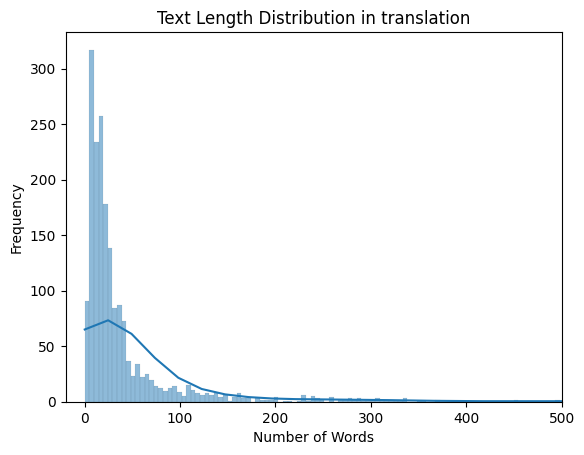

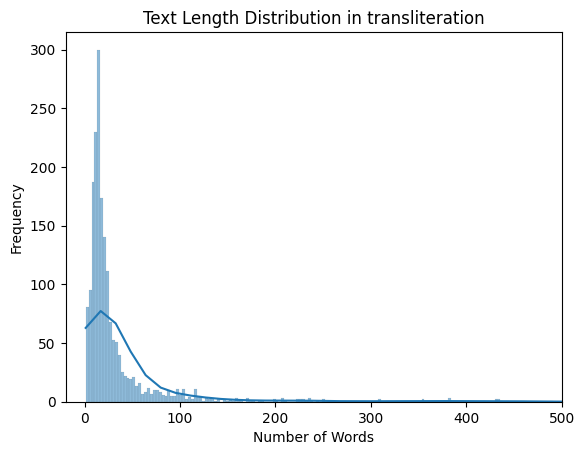

In [115]:
def text_length_analysis(df, column):
    df['text_length'] = df[column].apply(lambda x: len(x.split()))
    sns.histplot(df['text_length'], kde=True)
    plt.title(f'Text Length Distribution in {column}')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.xlim(-20, 500)
    plt.show()

text_length_analysis(df, 'translation')
text_length_analysis(df, 'transliteration')

### Character frequency analysis in transcriptions

In [116]:
# clean sumTablets_train glyphs
def clean_glyphs(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'[a-zA-Z]', '', text)  # Remove Latin characters
    return text.strip().lower()
df['glyphs'] = df['glyphs'].apply(clean_glyphs)
df

id                                             glyphs  \
0     P514378  íêäíã°íÅâíêäíã°íÉªíêäíÇÜíãß íêàíÇÜíâåíà´íÇÜíâÄ íå®íÄ≠íéèíÜ§ íêäíã°íÅâíêäíã°íÉªíêäíÇÜ íêàíÇÜíâåíà´íÇÜíâÄ íÄÄíÅïíÄÄ íêäíã°íÅâíêä...   
1     P416427  íá≤íâåíÅπíà´íã°íÇ†íä∫ íàóíå´íäèíâå íå®íÑëíáÄíåâíÄâíÄÄíãõíáª íêàíã°íå®íÄ≠íÖóíÅ≤ íêàíã°íàóíÄâíç£íÅïíåâíÄ≠íÄäíåëíäí íêàíà¶íã°íáΩíÄ≠...   
2     P102320     íÅπíÑûíä∫ íåìíåãíÑ∞ íÜ†íÄäíÅÄíä∑íÇµíã´ íÄÄíÑ∑íâøíÖï íâåíÜ™  _ íåóíÇ°íÄ≠íàæ íà¨íÇóíà§íÉ≤íÄ≠íàæíÇóíÄ≠íãÄíÜ†íÅÄíÇ†  íÅπ   
3     P424401  íÅπíÇçíÜ† íåóíäëíã´ íÅπíàóíçèíÅÄíÄ≠ íåóíãóíÜ∞íàæíã´ íÅπíÑííÜ∑ íåóíÇçíåóíêãíã´  íäëíäëíÇµ íâ∫íÅÄíä∑ íÅæíâÜíäÆíåì íå®íÄÄ...   
4     P131770  íêâíà¶íÇÜíåãíà´íä∫íÜ¨íåì íãõíâåíåà _ íê†íêóíÑ©íäïíâΩ íÜ¨íÅâíà´íÇÜíÖÜíêãíÖÖíêãíä∫ íêûíêñíÑ©íäÆíÅá íÜ¨íÅâíà´íÇÜ íêÑíÑòíã† ...   
...       ...                                                ...   
1902  P320037             íÇ∑íÅæíÅÄ íÅæíÅçíÅï íÄÄíäííÄÄíÄ≠íéèíà•íÜ† íÑäíáΩíÑ∑íâàíäííÜ†  íâåíÖÖ _ íà¨íÇóíãºíÄäíÉ≤íÄ≠íàπíÅÄíÇ†   
1903  P010890                      íêöíéôíã†íà†íàæ íÄïíÜ† íêïíêèíã†íà†íàæ  íÑëíÜµíÜ† íêôíã†íà†íàæ íÑòíåçíÑëíÜï   
1904  P416437  íà´íáªíä∫íêâíÑ∞íçë íà´íáªíä∫íÄ≠íàπ íäÆíàóíÜ† íàß íàó íäÆíãÄíÄäíÜ†íà† íà´íáªíä∫íêà íà´íáªíä∫íÄ≠íÇóíÜ† íÅπíáªíä∫íÅæíÜ∑íà§ ...   
1905  P106830  íåãíêÉíä∫íÑ•íàó íÜ†íÄúíÅïíã´ íäÆíãÄíÄäíÜ†íà†  íáΩíÑ≠íÇµ íãóíÅÄíãæ íåó _  íåãíêÉíä∫íÑ•íàó _ íÅïíã´  íáΩíÑ≠íÇµ...   
1906  P459080     íåãíá≤íÅπíáª íåìíéôíêçíÑ∞ íÜ†íÄäíÅÄíä∑íÇµíã´ íàæíàúíâåíÜ™  _ íåóíâàíÖ• íà¨íÇóíãºíÄäíÉ≤íÄ≠íàπíÄïíÜ†íÇµíÅÄíÇ†  íåãíá≤íÅπ   

                   period              genre  \
0                  Ur III     Administrative   
1                  Ur III     Administrative   
2                  Ur III     Administrative   
3                  Ur III     Administrative   
4                  Ur III     Administrative   
...                   ...                ...   
1902               Ur III     Administrative   
1903  Early Dynastic IIIa     Administrative   
1904               Ur III  Royal Inscription   
1905               Ur III     Administrative   
1906               Ur III     Administrative   

                                        transliteration  \
0     5di≈° sila‚ÇÉ ka≈° 5di≈° sila‚ÇÉ ninda 5di≈° gin‚ÇÇ ≈°um‚ÇÇ...   
1     la‚ÇÇia‚ÇÉ1barig 2di≈° sila‚ÇÉ dabin lugalur‚ÇÇrani urg...   
2     1di≈° gu‚ÇÑ niga u‚ÇÑ 1ukam ki abbasa‚ÇÜgata ahuweer ...   
3     1di≈° e‚ÇÇki iti dalta 1di≈° lugalda‚ÇÖbaan iti ≈°unu...   
4     4di≈° 12di≈° gin‚ÇÇ 1u 2di≈° ≈°e ku‚ÇÉbabbar sii‚ÇÉtum 3...   
...                                                 ...   
1902  pisan dubba dub gid‚ÇÇda arua dninmarki giri‚ÇÉ lu...   
1903  6ge≈°‚ÇÇ 2u siki mana unuki 1ge≈°‚ÇÇ 4u siki mana um...   
1904  2di≈° udu niga 4di≈°kam us‚ÇÇ 2di≈° udu niga dinann...   
1905  1u 5a≈° ≈°e gur lugal ki addata ≈°a‚ÇÉ uri‚ÇÖkima lu‚ÇÇ...   
1906  1u la‚ÇÇ 1di≈° udu u‚ÇÑ 2u 8di≈°kam ki abbasa‚ÇÜgata n...   

                                            translation  text_length  
0     5 sila3 beer 5 sila3 bread 5 shekels garlic 3 ...          157  
1     repaid arrears 1 barig 2 sila3 of dabinflour l...           41  
2     1 ox grainfed 10th day from abbasaga a·∏´uwer ac...           17  
3     1 eki from the month flight 1 lugaldaban from ...           27  
4     4 12 shekels 12 grains of silver the remaining...          232  
...                                                 ...          ...  
1902  basketoftablets longtablets votive offerings o...           13  
1903       30 onetalent stones weights with wooden pegs           17  
1904  2 sheep barleyfed of 4th grade 2 sheep barleyf...           71  
1905  15 gur barley according to the kings gur from ...           29  
1906  9 r

/Users/lucamartucci/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/lucamartucci/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


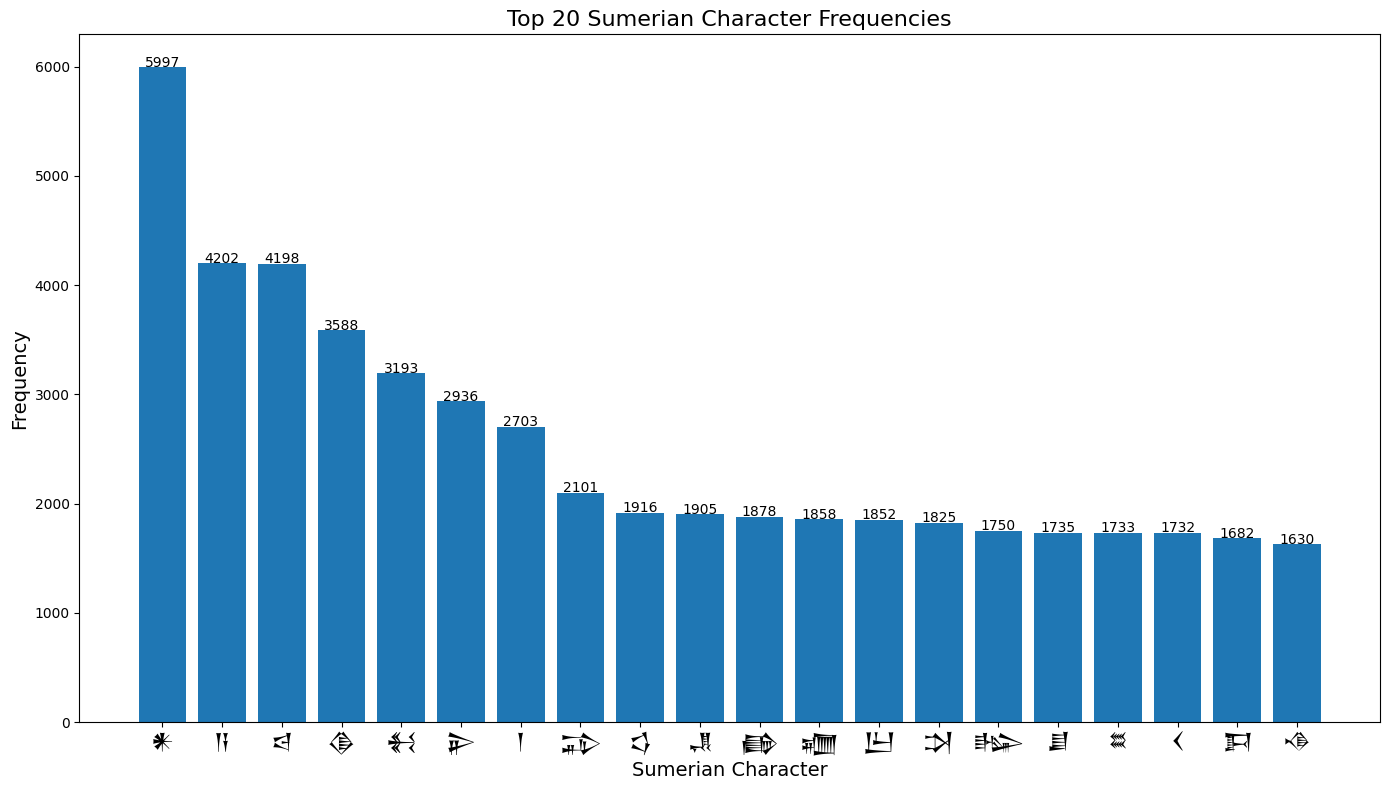

Top 20 Sumerian characters by frequency:


Character  Frequency
11          íÄ≠       5997
14          íÄÄ       4202
82          íÅÄ       4198
74          íÜ†       3588
79          íà¨       3193
..        ...        ...
453         íÜì          1
455         íÅõ          1
398         íâ©          1
277         íê∏          1
479         íÅë          1

[480 rows x 2 columns]

In [117]:
def character_frequency_analysis(df, column, font_path='../fonts/SumerianFont.ttf'):
    import matplotlib.font_manager as fm
    import matplotlib as mpl
    
    # Register the custom font
    custom_font = fm.FontProperties(fname=font_path)
    
    # Save original font settings
    original_font_family = mpl.rcParams['font.family']
    
    # Get character frequencies
    all_text = ''.join(df[column].astype(str).tolist())
    char_counts = Counter([char for char in all_text if char != ' ' and char != ''])
    char_df = pd.DataFrame(char_counts.items(), columns=['Character', 'Frequency'])
    char_df = char_df.sort_values(by='Frequency', ascending=False)
    
    # Create the plot
    plt.figure(figsize=(14, 8))
    bars = plt.bar(char_df['Character'].head(20), char_df['Frequency'].head(20))
    
    # Configure the plot with default font for titles and labels (not Cuneiform)
    plt.title('Top 20 Sumerian Character Frequencies', fontsize=16)
    plt.xlabel('Sumerian Character', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    
    # Only use Cuneiform font for the x-tick labels (the actual Sumerian characters)
    plt.xticks(fontproperties=custom_font, fontsize=16, rotation=0)
    
    # Add frequency values above bars with default font
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 5,
                 f'{int(height)}', ha='center', fontsize=10)
    
    # Apply tight layout with warning suppression
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        plt.tight_layout()
    
    plt.show()
    
    # Restore original font settings
    mpl.rcParams['font.family'] = original_font_family
    
    return char_df

sumerian_font_path = '../fonts/NotoSansCuneiform-Regular.ttf'
char_df = character_frequency_analysis(df, 'glyphs', sumerian_font_path)

print("Top 20 Sumerian characters by frequency:")
display(char_df)

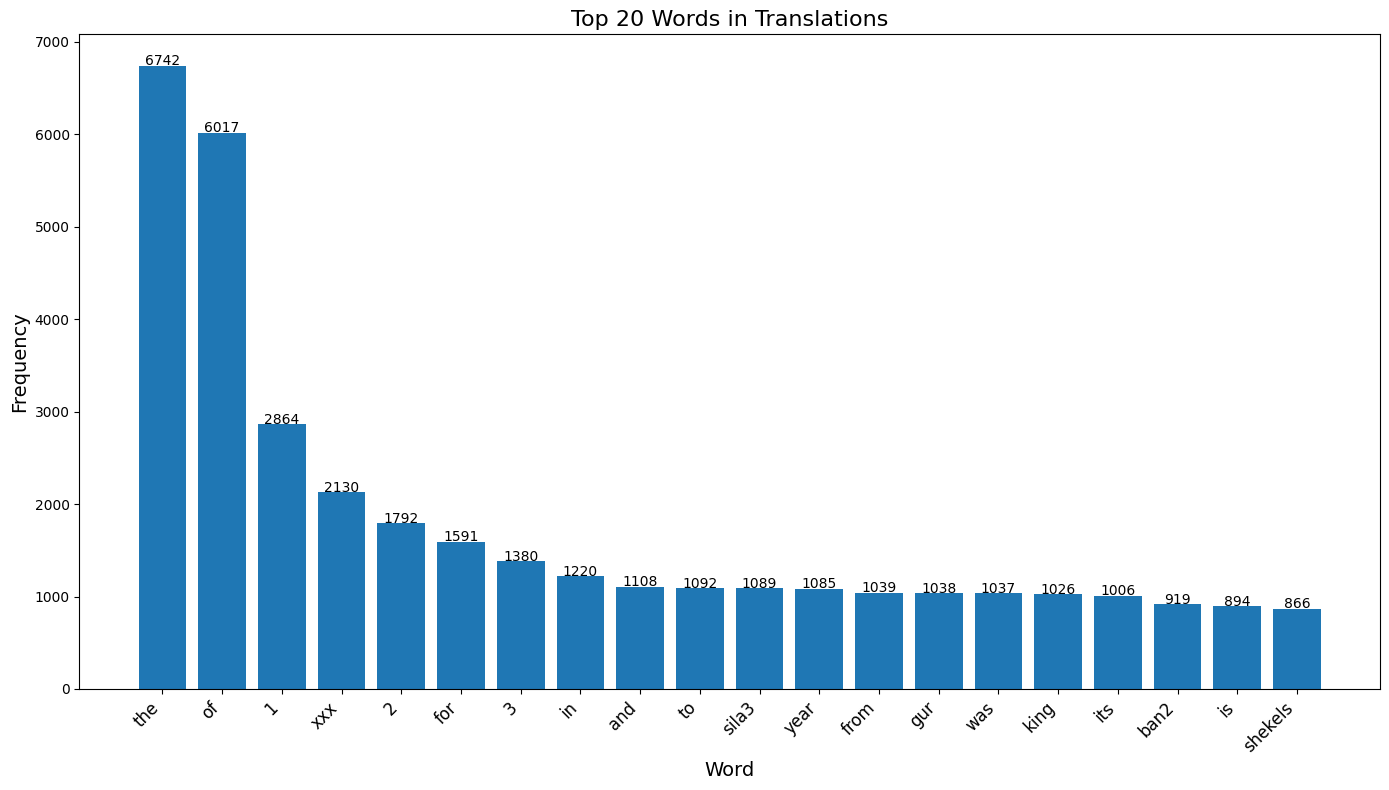

In [118]:
def word_frequency_analysis(df, column):
    all_text = ' '.join(df[column].astype(str).tolist())
    word_counts = Counter(all_text.split())
    word_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])
    word_df = word_df.sort_values(by='Frequency', ascending=False)

    # Create the plot
    plt.figure(figsize=(14, 8))
    bars = plt.bar(word_df['Word'].head(20), word_df['Frequency'].head(20))
    plt.title('Top 20 Words in Translations', fontsize=16)
    plt.xlabel('Word', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 5,
                 f'{int(height)}', ha='center', fontsize=10)
    plt.tight_layout()
    plt.show()

word_freq_df = word_frequency_analysis(df, 'translation')

There are many 'xxx' in the true translations and this is worth taking into acconut into our later evaluataion of translation models.

In [119]:

filtered = df[df['translation']
              .str.contains(r'\bxxx\b',  
                            case=False,  
                            na=False     
              )]
filtered['translation']

10        basketoftablets xxx xxx xxx xxx xxx xxx xxx xxx
13            basketoftablets xxx xxx xxx xxx xxx xxx xxx
21                    basketoftablets xxx xxx xxx xxx xxx
22      basketoftablets xxx xxx xxx xxx xxx xxx xxx xx...
24      basketoftablets reckoned accounts xxx of the h...
                              ...                        
1872                  basketoftablets xxx xxx xxx xxx xxx
1874      basketoftablets xxx xxx xxx xxx xxx xxx xxx xxx
1884                              basketoftablets xxx xxx
1895              basketoftablets xxx xxx xxx xxx xxx xxx
1896                          basketoftablets xxx xxx xxx
Name: translation, Length: 357, dtype: object

We can see these translation are pretty far-fetched. Hence, we filter them out of the dataframe.  

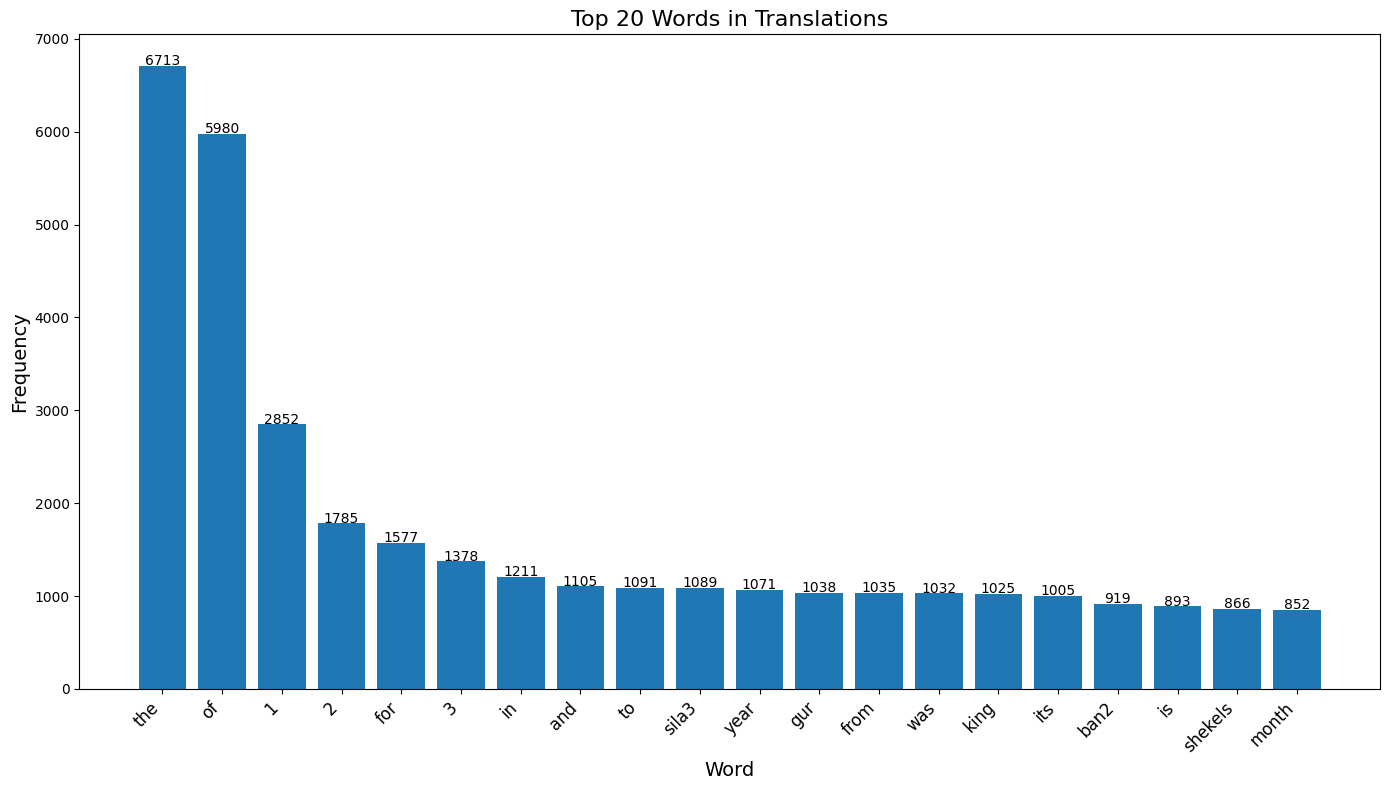

In [120]:
df_fil = df[~df['translation'].str.contains(r'\bxxx\b', case=False, na=False)]

df_fil
word_freq_df = word_frequency_analysis(df_fil, 'translation')

Little has changed, yet for future tasks it is surely beneficial to eliminate "corrupted" translations.

### Topic prevalence

/var/folders/1f/lm9ktttd6jz81rf_v4xh_m980000gn/T/ipykernel_7202/532282475.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weights, y=top_words, palette="rocket")


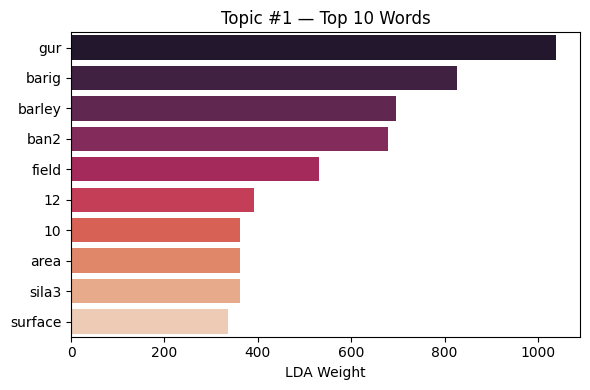

/var/folders/1f/lm9ktttd6jz81rf_v4xh_m980000gn/T/ipykernel_7202/532282475.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weights, y=top_words, palette="rocket")


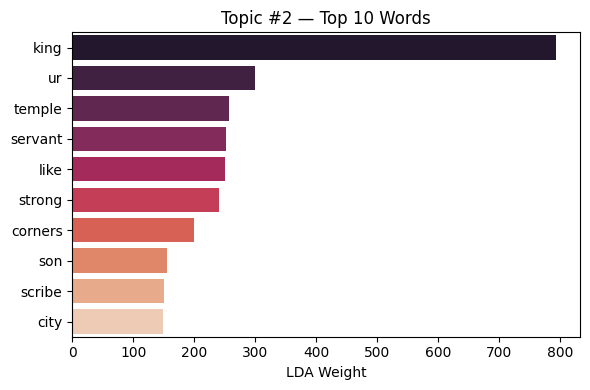

/var/folders/1f/lm9ktttd6jz81rf_v4xh_m980000gn/T/ipykernel_7202/532282475.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weights, y=top_words, palette="rocket")


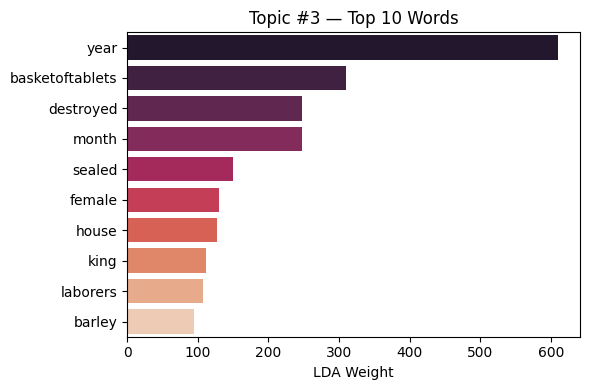

/var/folders/1f/lm9ktttd6jz81rf_v4xh_m980000gn/T/ipykernel_7202/532282475.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weights, y=top_words, palette="rocket")


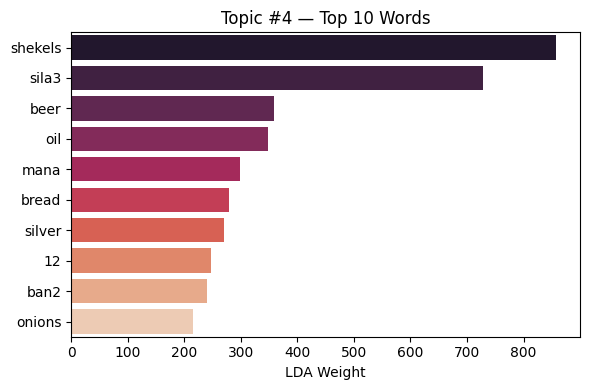

/var/folders/1f/lm9ktttd6jz81rf_v4xh_m980000gn/T/ipykernel_7202/532282475.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weights, y=top_words, palette="rocket")


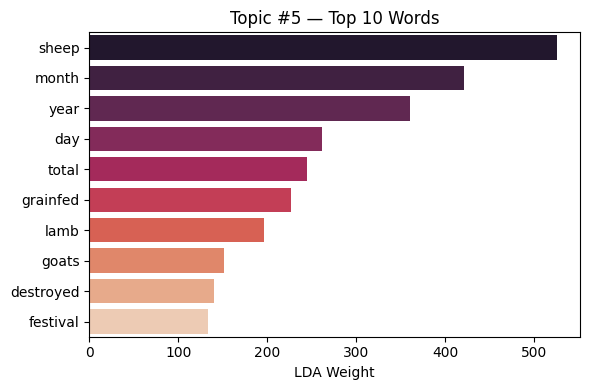

In [125]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Prepare the corpus. For instance, use the ‚Äútranslation‚Äù column (or the ‚Äútransliteration‚Äù column) as input.
vectorizer = CountVectorizer(stop_words="english", max_df=0.8, min_df=5)
X = vectorizer.fit_transform(df_fil["translation"].astype(str))

# Fit an LDA (say, 5 topics)
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# For each topic, grab the top‚Äêk words
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[::-1][:n_top_words]
    top_words = feature_names[top_indices]
    top_weights = topic[top_indices]
    
    plt.figure(figsize=(6, 4))
    sns.barplot(x=top_weights, y=top_words, palette="rocket")
    plt.title(f"Topic #{topic_idx + 1} ‚Äî Top {n_top_words} Words")
    plt.xlabel("LDA Weight")
    plt.tight_layout()
    plt.show()


### Linguistic Pattern Recognition

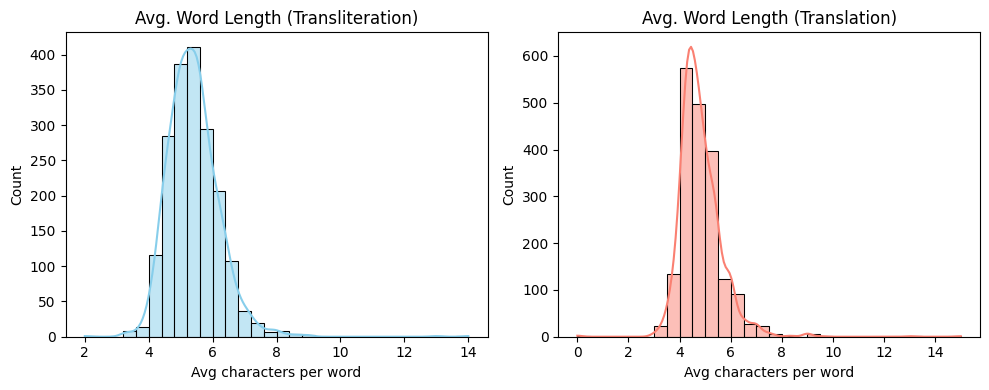

In [130]:
# Define a function to compute average word‚Äêlength per document
def avg_word_length(text: str):
    words = text.split()
    if len(words) == 0:
        return 0
    lengths = [len(w) for w in words]
    return sum(lengths) / len(lengths)

# Add new columns for avg word length in transliteration & translation
df["avg_len_translit"] = df["transliteration"].fillna("").apply(avg_word_length)
df["avg_len_trans"] = df["translation"].fillna("").apply(avg_word_length)

# Plot histograms side by side
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df["avg_len_translit"], bins=30, kde=True, color="skyblue")
plt.title("Avg. Word Length (Transliteration)")
plt.xlabel("Avg characters per word")

plt.subplot(1, 2, 2)
sns.histplot(df["avg_len_trans"], bins=30, kde=True, color="salmon")
plt.title("Avg. Word Length (Translation)")
plt.xlabel("Avg characters per word")

plt.tight_layout()
plt.show()


/var/folders/1f/lm9ktttd6jz81rf_v4xh_m980000gn/T/ipykernel_7202/2018660279.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counts, y=top_bigrams, palette="viridis")


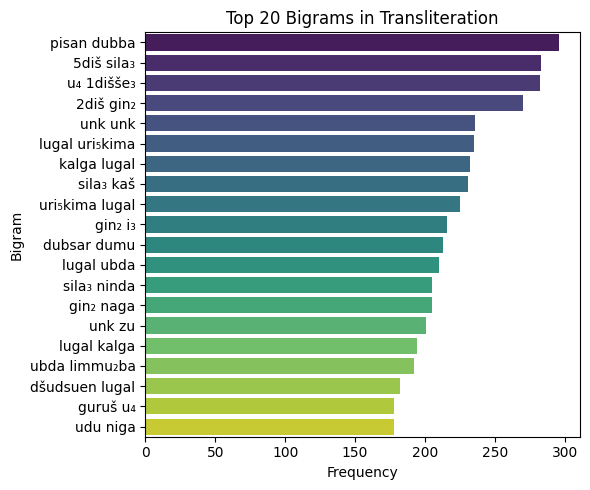

In [157]:
from sklearn.feature_extraction.text import CountVectorizer

bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), min_df=5, stop_words="english")
X_bi = bigram_vectorizer.fit_transform(df_fil["transliteration"].astype(str))
sum_bi = X_bi.sum(axis=0).A1  # total counts for each bigram
bigrams = bigram_vectorizer.get_feature_names_out()

# 20 most frequent bigrams
top_n = 20
top_idx = sum_bi.argsort()[::-1][:top_n]
top_bigrams = [bigrams[i] for i in top_idx]
top_counts = sum_bi[top_idx]

plt.figure(figsize=(6, 5))
sns.barplot(x=top_counts, y=top_bigrams, palette="viridis")
plt.title("Top 20 Bigrams in Transliteration")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.tight_layout()
plt.show()


/var/folders/1f/lm9ktttd6jz81rf_v4xh_m980000gn/T/ipykernel_7202/3154177395.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counts_trans, y=top_bigrams_trans, palette="viridis")


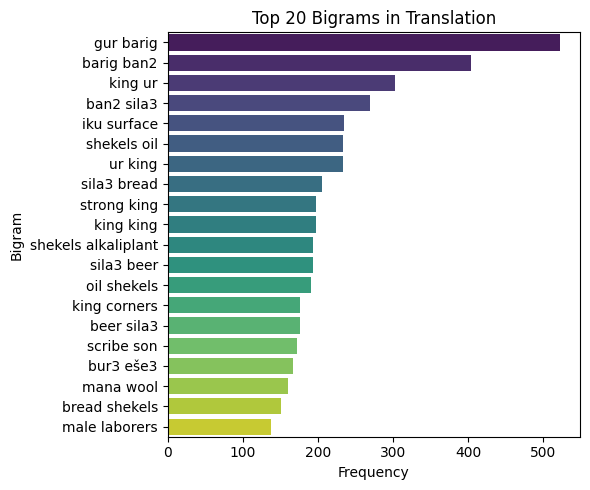

In [ ]:
# Build a bigram‚Äêonly CountVectorizer on the translation column
bigram_vectorizer_trans = CountVectorizer(
    ngram_range=(2, 2),
    min_df=5,
    stop_words="english"   
)

X_bi_trans = bigram_vectorizer_trans.fit_transform(df_fil["translation"].fillna("").astype(str))

# Sum up counts for each bigram across all documents
sum_bi_trans = X_bi_trans.sum(axis=0).A1
bigrams_trans = bigram_vectorizer_trans.get_feature_names_out()

# Pick the top 20 most frequent bigrams
top_n = 20
top_idx_trans = sum_bi_trans.argsort()[::-1][:top_n]
top_bigrams_trans = [bigrams_trans[i] for i in top_idx_trans]
top_counts_trans = sum_bi_trans[top_idx_trans]

# Plot a horizontal bar chart of the top 20 bigrams (translation)
plt.figure(figsize=(6, 5))
sns.barplot(x=top_counts_trans, y=top_bigrams_trans, palette="viridis")
plt.title("Top 20 Bigrams in Translation")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.tight_layout()
plt.show()


### Translation Quality Assessment

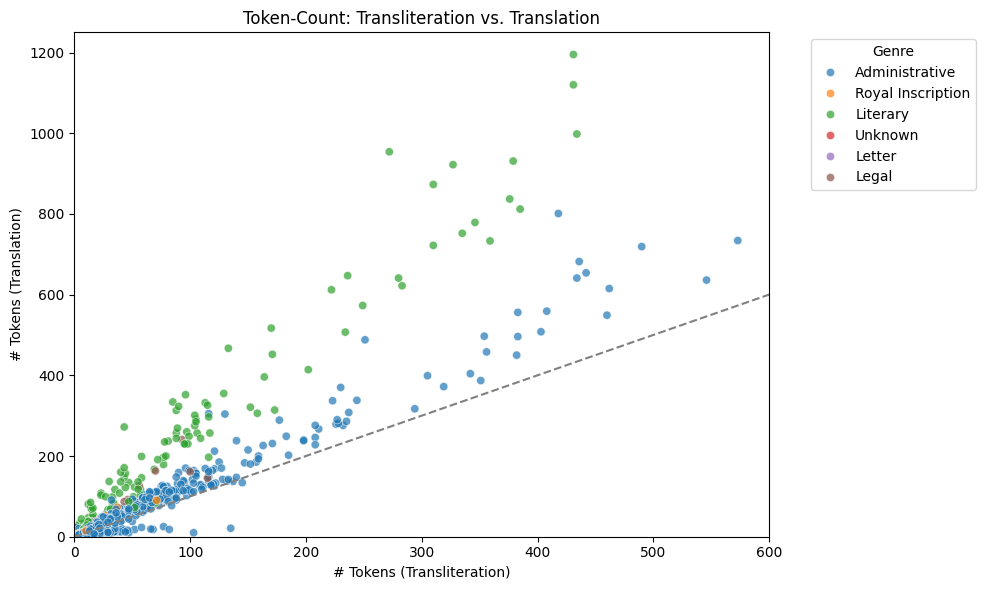

In [159]:
# Compute token‚Äêcounts
df["tokens_translit"] = df["transliteration"].fillna("").apply(lambda t: len(t.split()))
df["tokens_trans"] = df["translation"].fillna("").apply(lambda t: len(t.split()))

# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="tokens_translit",
    y="tokens_trans",
    data=df,
    hue="genre",     
    palette="tab10",
    alpha=0.7,
)
plt.plot([0, df[["tokens_translit", "tokens_trans"]].max().max()],
         [0, df[["tokens_translit", "tokens_trans"]].max().max()],
         ls="--", c="gray")
plt.title("Token‚ÄêCount: Transliteration vs. Translation")
plt.xlabel("# Tokens (Transliteration)")
plt.ylabel("# Tokens (Translation)")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

plt.xlim(0, 600)
plt.ylim(0, 1250)
plt.show()


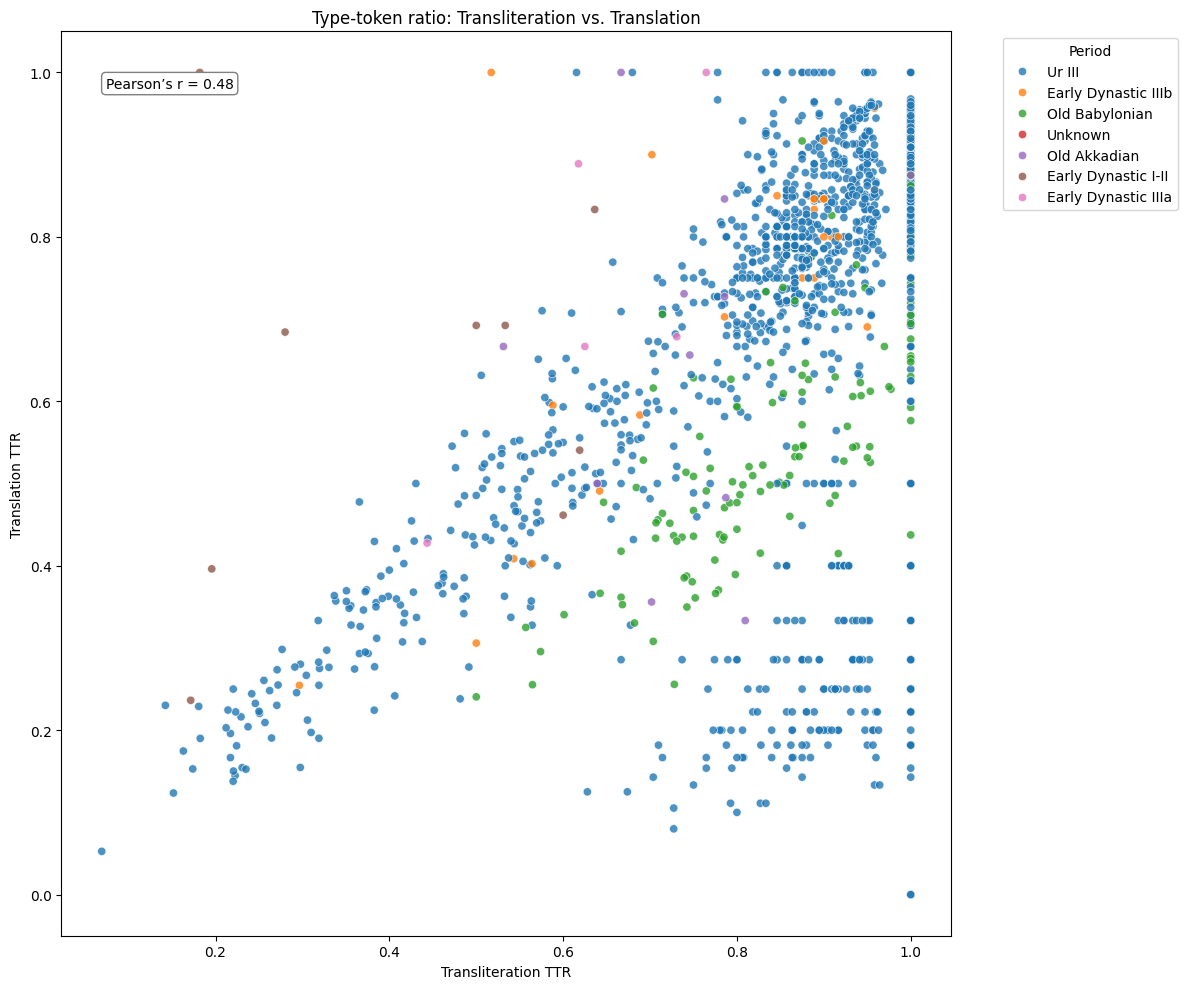

In [160]:
def type_token_ratio(text: str):
    words = text.split()
    n_tokens = len(words)
    if n_tokens == 0:
        return 0
    n_types = len(set(words))
    return n_types / n_tokens

# Compute TTR for translatio
df["ttr_trans"] = df["translation"].fillna("").apply(type_token_ratio)

# Scatterplot & Pearson correlation
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x="ttr_translit",
    y="ttr_trans",
    data=df,
    hue="period",
    palette="tab10",
    alpha=0.8,
)
plt.title("Type-token ratio: Transliteration vs. Translation")
plt.xlabel("Transliteration TTR")
plt.ylabel("Translation TTR")

# Compute and annotate Pearson's r on the plot
r = df[["ttr_translit", "ttr_trans"]].dropna().corr().iloc[0, 1]
plt.text(
    0.05,
    0.95,
    f"Pearson‚Äôs r = {r:.2f}",
    transform=plt.gca().transAxes,
    ha="left",
    va="top",
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray"),
)

plt.legend(title="Period", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


Total and per-type token counts, over each single period, are mapped linearly from transliteration to translation, assessing the good quality of the latter.